In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel("12.01.22 USEER 2021 county data for release.xlsx", header=1)
df.head()

,State,State.1,County FIPS,County Name,Unnamed: 4,Solar,Wind,Hydroelectric,Low-Impact Hydroelectric,Natural Gas,...,High Efficiency HVAC & Renewable H&C,Advanced Materials & Insulation,Other.2,Unnamed: 33,MV,Unnamed: 35,EPG,TDS,Fuels,EE
0,AL,Alabama,1001,Autauga County,0,< 10,< 10,< 10,< 10,44,...,11,60,< 10,0,563.689032,NaN,44,77,0,89
1,AL,Alabama,1003,Baldwin County,0,32,36,< 10,< 10,13,...,98,493,80,0,637.746252,NaN,97,836,126,904
2,AL,Alabama,1005,Barbour County,0,< 10,< 10,< 10,< 10,< 10,...,< 10,19,< 10,0,77.976655,NaN,0,106,57,19
3,AL,Alabama,1007,Bibb County,0,< 10,< 10,< 10,< 10,< 10,...,< 10,14,< 10,0,320.673391,NaN,0,65,22,14
4,AL,Alabama,1009,Blount County,0,< 10,< 10,< 10,< 10,< 10,...,16,69,11,0,204.166674,NaN,0,36,0,121


In [26]:
df_cleaned = df.loc[:, ~df.columns.str.startswith('Unnamed')]

In [27]:
df_cleaned.head()

,State,State.1,County FIPS,County Name,Solar,Wind,Hydroelectric,Low-Impact Hydroelectric,Natural Gas,Coal,...,ENERGY STAR & Efficient Lighting,Traditional HVAC,High Efficiency HVAC & Renewable H&C,Advanced Materials & Insulation,Other.2,MV,EPG,TDS,Fuels,EE
0,AL,Alabama,1001,Autauga County,< 10,< 10,< 10,< 10,44,< 10,...,< 10,18,11,60,< 10,563.689032,44,77,0,89
1,AL,Alabama,1003,Baldwin County,32,36,< 10,< 10,13,16,...,75,158,98,493,80,637.746252,97,836,126,904
2,AL,Alabama,1005,Barbour County,< 10,< 10,< 10,< 10,< 10,< 10,...,< 10,< 10,< 10,19,< 10,77.976655,0,106,57,19
3,AL,Alabama,1007,Bibb County,< 10,< 10,< 10,< 10,< 10,< 10,...,< 10,< 10,< 10,14,< 10,320.673391,0,65,22,14
4,AL,Alabama,1009,Blount County,< 10,< 10,< 10,< 10,< 10,< 10,...,< 10,25,16,69,11,204.166674,0,36,0,121


In [28]:
columns_to_keep = [
    "State", "State.1", "County FIPS", "County Name", 
    "Solar", "Wind", "Hydroelectric", "Low-Impact Hydroelectric", 
    "Natural Gas", "Coal", "Oil & Other FF", "Other", 
    "Coal.1", "Petroleum", "Natural Gas.1", 
    "Woody Biomass", "Corn Ethanol", "Other Clean Fuels", "Other.1"
]


In [29]:
# filtering the dataframe to keep only the specified columns
df_filtered = df_cleaned[columns_to_keep]
# display the first few rows
df_filtered.head()

,State,State.1,County FIPS,County Name,Solar,Wind,Hydroelectric,Low-Impact Hydroelectric,Natural Gas,Coal,Oil & Other FF,Other,Coal.1,Petroleum,Natural Gas.1,Woody Biomass,Corn Ethanol,Other Clean Fuels,Other.1
0,AL,Alabama,1001,Autauga County,< 10,< 10,< 10,< 10,44,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10
1,AL,Alabama,1003,Baldwin County,32,36,< 10,< 10,13,16,< 10,< 10,< 10,73,< 10,< 10,14,21,18
2,AL,Alabama,1005,Barbour County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,29,< 10,28,< 10,< 10,< 10
3,AL,Alabama,1007,Bibb County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,22,< 10,< 10,< 10
4,AL,Alabama,1009,Blount County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10


In [30]:
rename_columns = {
    "Solar": "EPG. Solar", "Wind": "EPG. Wind", "Hydroelectric": "EPG. Hydroelectric",
    "Low-Impact Hydroelectric": "EPG. Low-Impact Hydroelectric", "Natural Gas": "EPG. Natural Gas",
    "Coal": "EPG. Coal", "Oil & Other FF": "EPG. Oil & Other FF", "Other": "EPG. Other",
    "Coal.1": "Fuel. Coal", "Petroleum": "Fuel. Petroleum", "Natural Gas.1": "Fuel. Natural Gas",
    "Woody Biomass": "Fuel. Woody Biomass", "Corn Ethanol": "Fuel. Corn Ethanol",
    "Other Clean Fuels": "Fuel. Other Clean Fuels", "Other.1": "Fuel. Other"
}

# applying the renaming to the dataframe
df_renamed = df_filtered.rename(columns=rename_columns)

df_renamed.head()

,State,State.1,County FIPS,County Name,EPG. Solar,EPG. Wind,EPG. Hydroelectric,EPG. Low-Impact Hydroelectric,EPG. Natural Gas,EPG. Coal,EPG. Oil & Other FF,EPG. Other,Fuel. Coal,Fuel. Petroleum,Fuel. Natural Gas,Fuel. Woody Biomass,Fuel. Corn Ethanol,Fuel. Other Clean Fuels,Fuel. Other
0,AL,Alabama,1001,Autauga County,< 10,< 10,< 10,< 10,44,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10
1,AL,Alabama,1003,Baldwin County,32,36,< 10,< 10,13,16,< 10,< 10,< 10,73,< 10,< 10,14,21,18
2,AL,Alabama,1005,Barbour County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,29,< 10,28,< 10,< 10,< 10
3,AL,Alabama,1007,Bibb County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,22,< 10,< 10,< 10
4,AL,Alabama,1009,Blount County,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10,< 10


In [31]:
# replacing '<10' with 1 and converting applicable columns to integers
df_renamed.replace('< 10', '1', inplace=True)

# columns to exclude from conversion
exclude_columns = ["State", "State.1", "County FIPS", "County Name"]

# converting applicable columns to integers
for col in df_renamed.columns:
    if col not in exclude_columns:
        df_renamed[col] = df_renamed[col].astype(int)

# display the first few rows of the dataframe to confirm the changes
df_renamed.head()


,State,State.1,County FIPS,County Name,EPG. Solar,EPG. Wind,EPG. Hydroelectric,EPG. Low-Impact Hydroelectric,EPG. Natural Gas,EPG. Coal,EPG. Oil & Other FF,EPG. Other,Fuel. Coal,Fuel. Petroleum,Fuel. Natural Gas,Fuel. Woody Biomass,Fuel. Corn Ethanol,Fuel. Other Clean Fuels,Fuel. Other
0,AL,Alabama,1001,Autauga County,1,1,1,1,44,1,1,1,1,1,1,1,1,1,1
1,AL,Alabama,1003,Baldwin County,32,36,1,1,13,16,1,1,1,73,1,1,14,21,18
2,AL,Alabama,1005,Barbour County,1,1,1,1,1,1,1,1,1,29,1,28,1,1,1
3,AL,Alabama,1007,Bibb County,1,1,1,1,1,1,1,1,1,1,1,22,1,1,1
4,AL,Alabama,1009,Blount County,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [32]:
# list of energy columns, ensure these match your DataFrame
energy_columns = ["EPG. Solar", "EPG. Wind", "EPG. Hydroelectric", "EPG. Low-Impact Hydroelectric", 
                  "EPG. Natural Gas", "EPG. Coal", "EPG. Oil & Other FF", "EPG. Other", 
                  "Fuel. Coal", "Fuel. Petroleum", "Fuel. Natural Gas", 
                  "Fuel. Woody Biomass", "Fuel. Corn Ethanol", "Fuel. Other Clean Fuels", "Fuel. Other"]

# find the column name of the max value in each row across the energy columns
df_renamed['MaxEnergyType'] = df_renamed[energy_columns].idxmax(axis=1)

df_renamed.head()


,State,State.1,County FIPS,County Name,EPG. Solar,EPG. Wind,EPG. Hydroelectric,EPG. Low-Impact Hydroelectric,EPG. Natural Gas,EPG. Coal,EPG. Oil & Other FF,EPG. Other,Fuel. Coal,Fuel. Petroleum,Fuel. Natural Gas,Fuel. Woody Biomass,Fuel. Corn Ethanol,Fuel. Other Clean Fuels,Fuel. Other,MaxEnergyType
0,AL,Alabama,1001,Autauga County,1,1,1,1,44,1,1,1,1,1,1,1,1,1,1,EPG. Natural Gas
1,AL,Alabama,1003,Baldwin County,32,36,1,1,13,16,1,1,1,73,1,1,14,21,18,Fuel. Petroleum
2,AL,Alabama,1005,Barbour County,1,1,1,1,1,1,1,1,1,29,1,28,1,1,1,Fuel. Petroleum
3,AL,Alabama,1007,Bibb County,1,1,1,1,1,1,1,1,1,1,1,22,1,1,1,Fuel. Woody Biomass
4,AL,Alabama,1009,Blount County,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,EPG. Solar


In [33]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

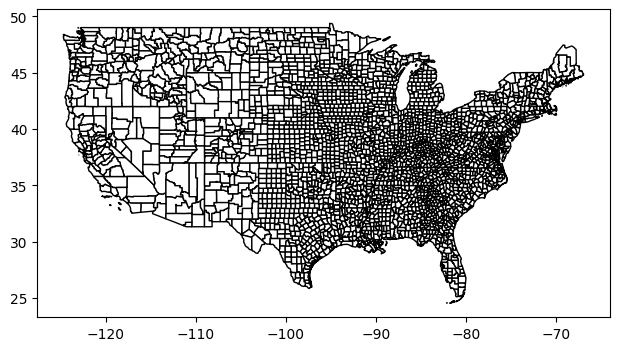

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is a string to match FIPS codes properly
geoData.id = geoData.id.astype(str)

# Remove Alaska, Hawaii, and Puerto Rico
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines using Geopandas plot method
fig, ax = plt.subplots(figsize=(20, 4))
geoData.plot(ax=ax, color='white', edgecolor='black')
plt.show()


In [35]:
geoData["id"]

0       01001
1       01009
2       01017
3       01021
4       01033
        ...  
3216    51001
3217    51021
3218    51027
3219    51037
3220    51041
Name: id, Length: 3109, dtype: object

In [36]:
df_renamed["County FIPS"] = df_renamed['County FIPS'].astype(str).str.zfill(5)
df_renamed["County FIPS"]

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3188    56039
3189    56041
3190    56043
3191    56045
3192    56999
Name: County FIPS, Length: 3193, dtype: object

In [37]:
merged_df = geoData.merge(df_renamed, left_on='id', right_on='County FIPS')
merged_df

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,State,State.1,...,EPG. Oil & Other FF,EPG. Other,Fuel. Coal,Fuel. Petroleum,Fuel. Natural Gas,Fuel. Woody Biomass,Fuel. Corn Ethanol,Fuel. Other Clean Fuels,Fuel. Other,MaxEnergyType
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",AL,Alabama,...,1,1,1,1,1,1,1,1,1,EPG. Natural Gas
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",AL,Alabama,...,1,1,1,1,1,1,1,1,1,EPG. Solar
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",AL,Alabama,...,0,1,1,1,1,42,1,1,1,Fuel. Woody Biomass
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",AL,Alabama,...,1,1,1,1,1,26,1,1,1,EPG. Hydroelectric
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",AL,Alabama,...,1,1,1,95,1,1,1,11,1,Fuel. Petroleum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",VA,Virginia,...,1,1,1,38,1,0,1,1,1,Fuel. Petroleum
3103,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",VA,Virginia,...,1,1,1,1,1,1,1,1,1,EPG. Solar
3104,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512...",VA,Virginia,...,1,1,902,1,70,1,1,1,1,Fuel. Coal
3105,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",VA,Virginia,...,0,1,1,1,1,62,1,1,1,Fuel. Woody Biomass


In [38]:
energy_type_to_color = {
    'EPG. Solar': 'yellow', 
    'EPG. Wind': 'blue', 
    'EPG. Hydroelectric': 'cyan', 
    'EPG. Low-Impact Hydroelectric': 'green',
    'EPG. Natural Gas': 'orange', 
    'EPG. Coal': 'grey', 
    'EPG. Oil & Other FF': 'red', 
    'EPG. Other': 'purple',
    'Fuel. Coal': 'black', 
    'Fuel. Petroleum': 'darkred', 
    'Fuel. Natural Gas': '#FFA07A',
    'Fuel. Woody Biomass': 'brown', 
    'Fuel. Corn Ethanol': 'pink', 
    'Fuel. Other Clean Fuels': 'lavender', 
    'Fuel. Other': 'lightgreen'
}

In [39]:
merged_df['color'] = merged_df['MaxEnergyType'].map(energy_type_to_color)

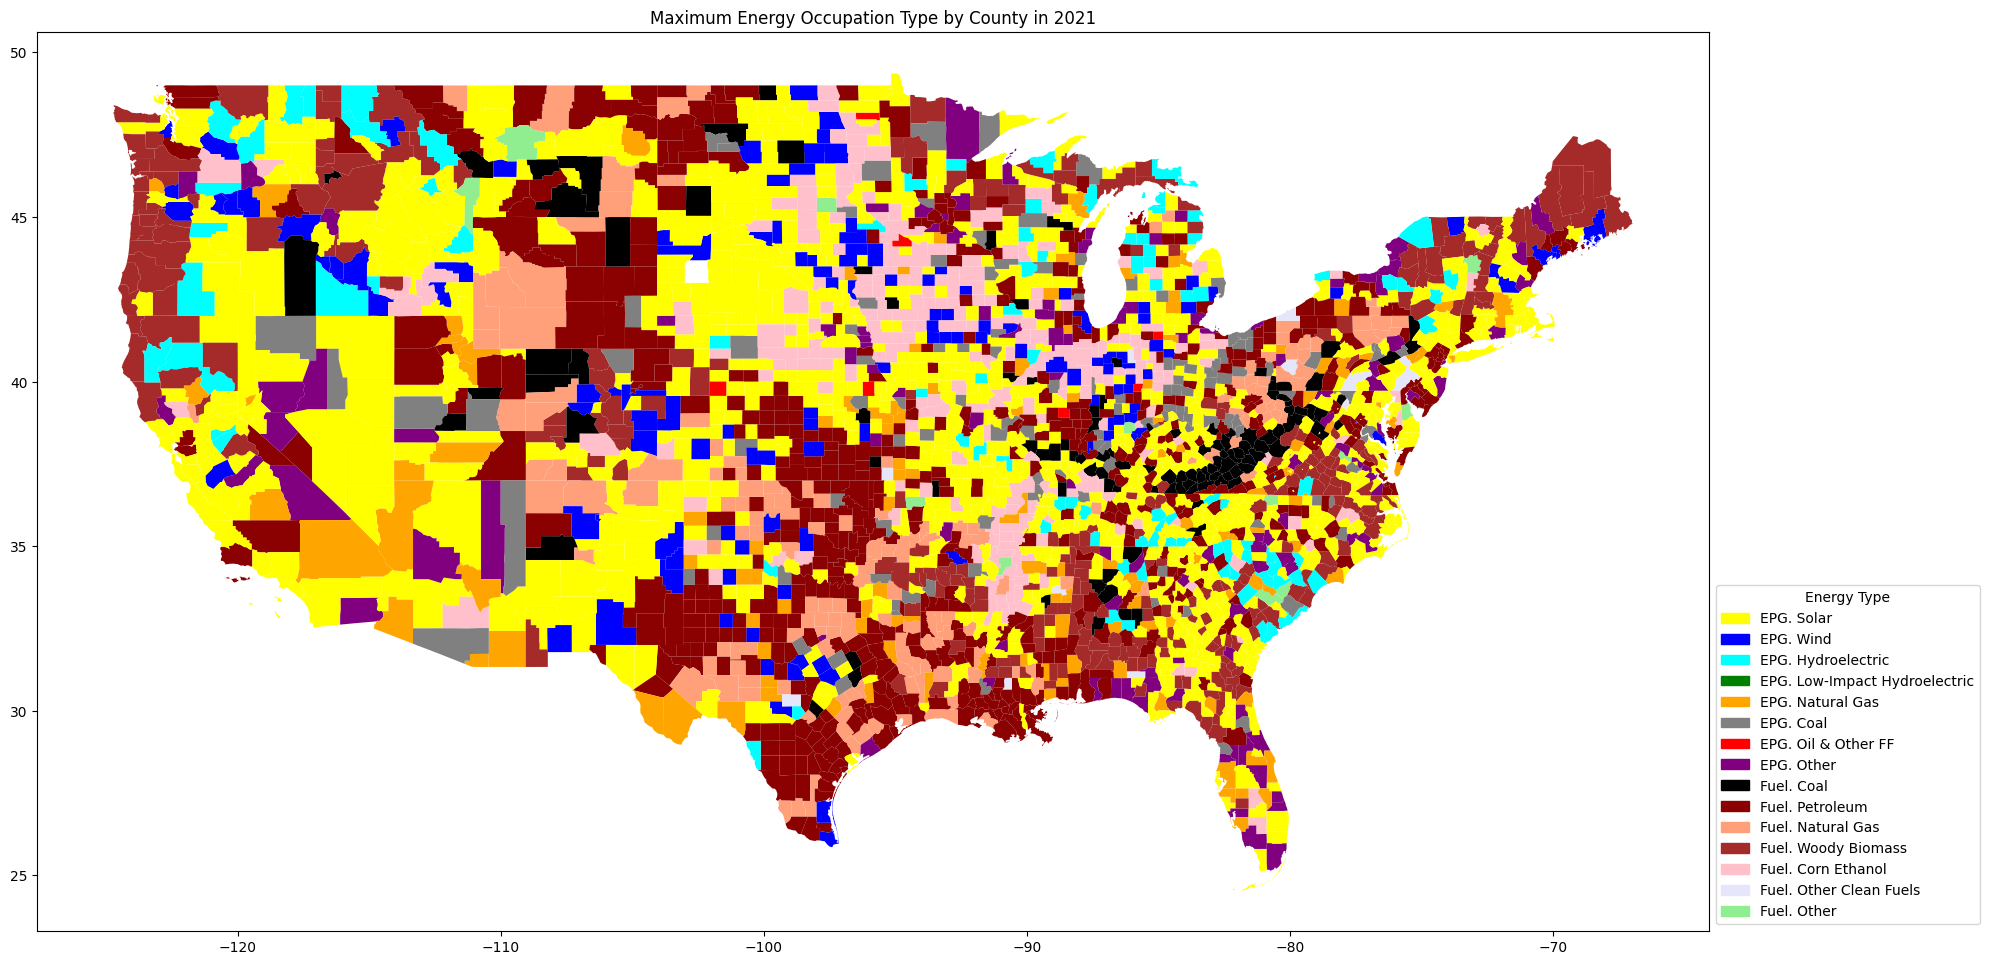

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plotting the counties with their corresponding colors
merged_df.plot(ax=ax, color=merged_df['color'])

# Generate custom legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in energy_type_to_color.items()]

# Add the custom legend to the plot
ax.legend(handles=legend_patches, title='Energy Type', loc='lower left', bbox_to_anchor=(1, 0))

# Setting the title for the axes
ax.set_title('Maximum Energy Occupation Type by County in 2021')

# To prevent the plot from being cut off when saving the figure, adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [41]:
# Map each energy type to a renewable/non-renewable category
energy_type_to_category = {
    'EPG. Solar': 'renewable',
    'EPG. Wind': 'renewable',
    'EPG. Hydroelectric': 'renewable',
    'EPG. Low-Impact Hydroelectric': 'renewable',
    'Fuel. Corn Ethanol': 'renewable',
    'Fuel. Other Clean Fuels': 'renewable',
    'EPG. Natural Gas': 'non-renewable',
    'EPG. Coal': 'non-renewable',
    'EPG. Oil & Other FF': 'non-renewable',
    'EPG. Other': 'non-renewable', 
    'Fuel. Coal': 'non-renewable',
    'Fuel. Petroleum': 'non-renewable',
    'Fuel. Natural Gas': 'non-renewable',
    'Fuel. Woody Biomass': 'non-renewable',  
    'Fuel. Other': 'non-renewable', 
}


# Use the MaxEnergyType to assign each county a category
merged_df['EnergyCategory'] = merged_df['MaxEnergyType'].map(energy_type_to_category)


In [42]:
# Map categories to colors
category_to_color = {
    'renewable': 'green',
    'non-renewable': 'red'
}

# Apply the color mapping
merged_df['color'] = merged_df['EnergyCategory'].map(category_to_color)


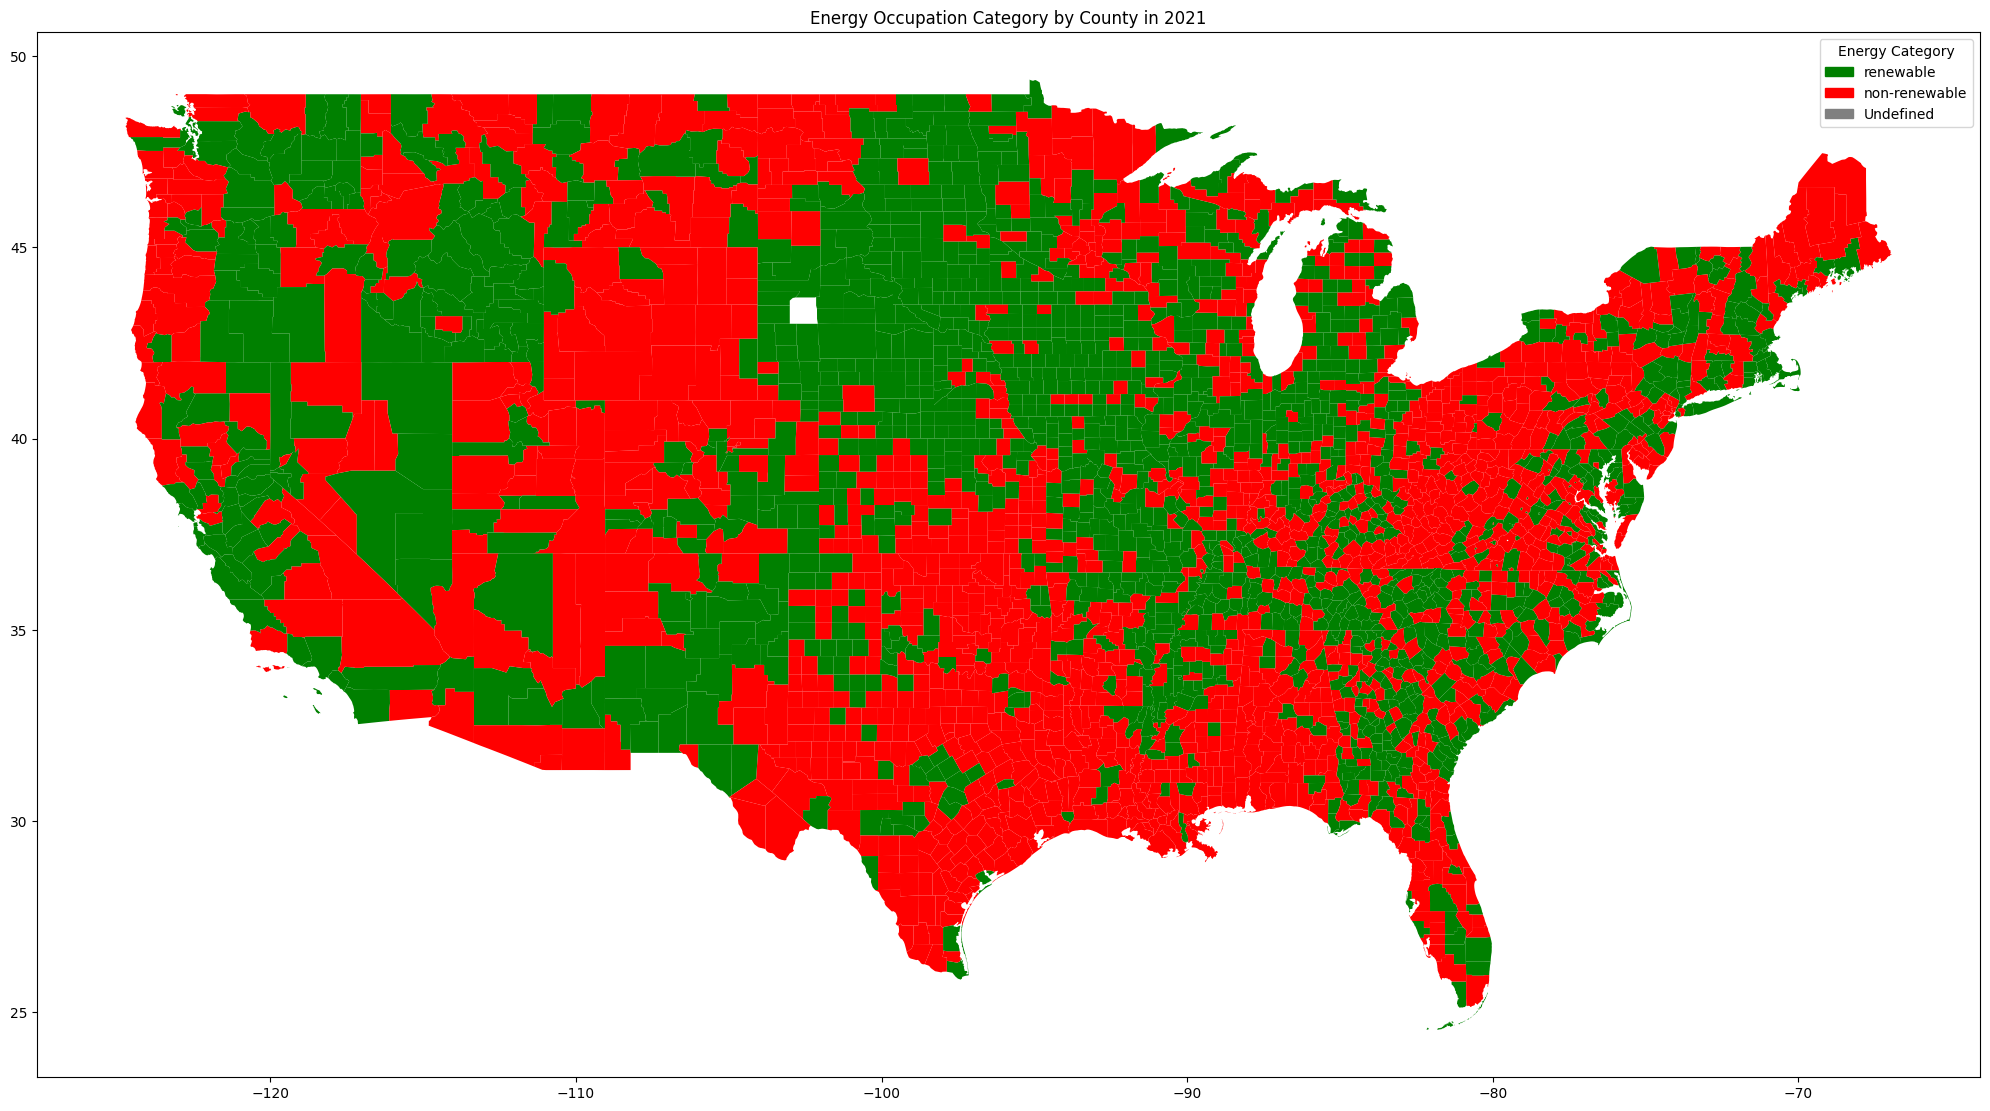

In [43]:
default_color = 'gray'  
merged_df['color'] = merged_df['color'].fillna(default_color)

fig, ax = plt.subplots(1, figsize=(20, 12))
merged_df.plot(ax=ax, color=merged_df['color'])

# Create custom legend patches, including one for the default category if necessary
legend_labels = list(category_to_color.keys()) + (['Undefined'] if default_color else [])
legend_colors = list(category_to_color.values()) + ([default_color] if default_color else [])
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]

ax.legend(handles=legend_patches, title='Energy Category')
ax.set_title('Energy Occupation Category by County in 2021')
plt.tight_layout()
plt.show()
